# Era5 *total wind speed* variable during AR event of Nov/Dec, 1999
Created by Eric S. Martinez  
Friday July 9, 2021

## Loading libraries

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime
import math
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


## Importing data

In [3]:
pn = '/Users/atoc_reu_student/Downloads/ERA5/Data/Hourly/'
fn_v10m = 'era5_sl_hourly_Antarctic_v10m_1999_nov_dec.nc'
fn_u10m = 'era5_sl_hourly_Antarctic_u10m_1999_nov_dec.nc'
fd_v10m = xr.open_mfdataset(pn + fn_v10m)
fd_u10m = xr.open_mfdataset(pn + fn_u10m)

# Creating variables for each of the coordinates in the v10m dataset
v10m_lon = fd_v10m.longitude
v10m_lat = fd_v10m.latitude
v10m_time = fd_v10m.time
v10m = fd_v10m.v10

# Creating variables for each of the coordinates in the u10m dataset
u10m_lon = fd_u10m.longitude
u10m_lat = fd_u10m.latitude
u10m_time = fd_u10m.time
u10m = fd_u10m.u10

lon, lat = np.meshgrid(v10m_lon, v10m_lat)


In [4]:
print(v10m_lon[1018])

<xarray.DataArray 'longitude' ()>
array(254.5, dtype=float32)
Coordinates:
    longitude  float32 254.5
Attributes:
    units:      degrees_east
    long_name:  longitude


## Setting *time* variable for total wind speed

In [5]:
# Checking to see whether the two different speed variables have the same time
print(v10m_time)
print(u10m_time)

<xarray.DataArray 'time' (time: 1464)>
array(['1999-11-01T00:00:00.000000000', '1999-11-01T01:00:00.000000000',
       '1999-11-01T02:00:00.000000000', ..., '1999-12-31T21:00:00.000000000',
       '1999-12-31T22:00:00.000000000', '1999-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-11-01 ... 1999-12-31T23:00:00
Attributes:
    long_name:  time
<xarray.DataArray 'time' (time: 1464)>
array(['1999-11-01T00:00:00.000000000', '1999-11-01T01:00:00.000000000',
       '1999-11-01T02:00:00.000000000', ..., '1999-12-31T21:00:00.000000000',
       '1999-12-31T22:00:00.000000000', '1999-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-11-01 ... 1999-12-31T23:00:00
Attributes:
    long_name:  time


In [6]:
# Set time variable 
time = np.array(v10m_time)
time_dates = []
for i in range(len(time)):
    string = np.array(time)[i].astype(str)
    split = string.split("T",1)
    time_dates.append(split[0])

## Specifying the location in the data

In [7]:
# Setting the coordinates of the data to a specific area near Thwaites
e5_v10_cavity_channel_loc = np.array(v10m[:,660,1018])
e5_u10_cavity_channel_loc = np.array(u10m[:,660,1018])

v10m_cc_loc = e5_v10_cavity_channel_loc
u10m_cc_loc = e5_u10_cavity_channel_loc

In [8]:
v10m_cc_loc

array([0.4627757 , 0.4550314 , 0.32006168, ..., 3.216381  , 3.0272017 ,
       2.9298468 ], dtype=float32)

## Calculating and plotting *total wind speed*

In [9]:
# Testing to see whether the two new variables have the same size
print(u10m_cc_loc.shape)
print(v10m_cc_loc.shape)

(1464,)
(1464,)


In [10]:
print(u10m_cc_loc)
print(v10m_cc_loc)

[ 1.9995149  2.1335073  1.4947063 ... -8.517331  -8.367758  -7.890994 ]
[0.4627757  0.4550314  0.32006168 ... 3.216381   3.0272017  2.9298468 ]


In [11]:
# Inputting the variables into the equation needed to figure out total wind speed
total_ws = np.sqrt(v10m_cc_loc*v10m_cc_loc + u10m_cc_loc*u10m_cc_loc)

In [12]:
ws_daily_avg = np.nanmean(total_ws, axis=0)
ws_daily_avg
total_ws**2

array([ 4.212221 ,  4.758907 ,  2.3365862, ..., 82.890045 , 79.18333  ,
       70.85179  ], dtype=float32)

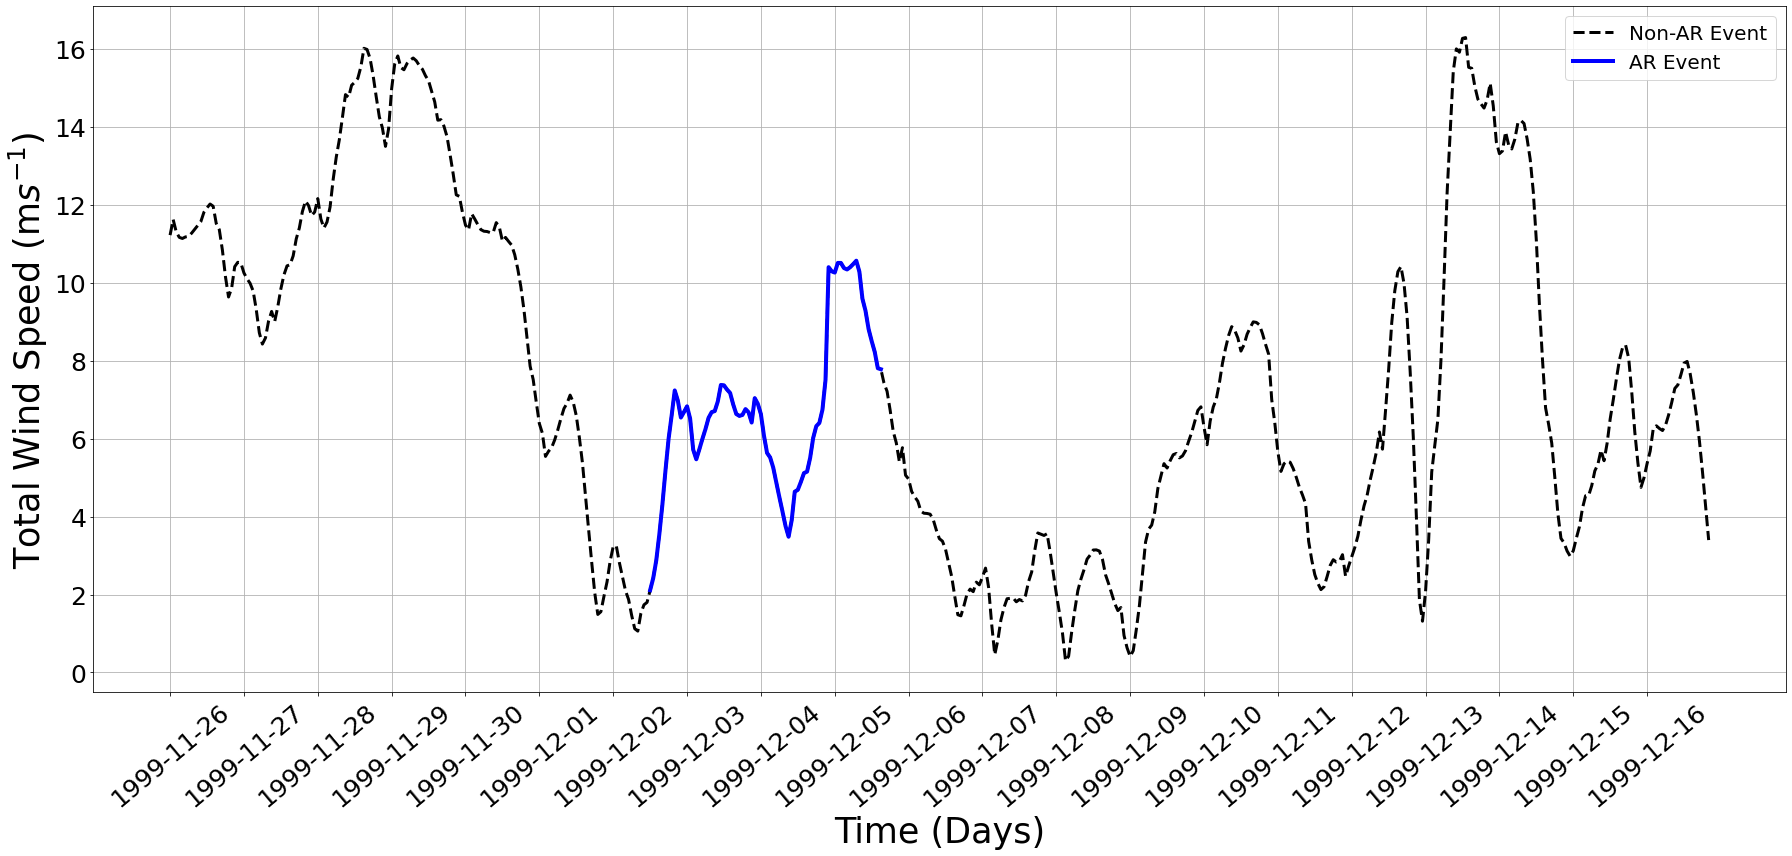

In [13]:
# Plotting the total wind speed
plt.figure(figsize=(25,12))
xaxis = np.linspace(0, len(time) - 1, len(time))
plt.plot(xaxis[600:1101], total_ws[600:1101], '--', linewidth = 3, color = 'black', label = 'Non-AR Event')
plt.plot(xaxis[756:832], total_ws[756:832], linewidth = 4, color = 'blue', label = 'AR Event')
plt.xticks(xaxis[600:1101][::24], time_dates[600:1101][::24], rotation = 40, fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (Days)', fontsize = 35)
plt.ylabel(r'Total Wind Speed (m$s^{-1}$)', fontsize = 35)
plt.legend(loc = 'upper right', prop = {'size': 20})
plt.tight_layout()
plt.grid()
plt.savefig('/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_total_ws_nov26_dec16.jpg', dpi = 100)
plt.show()


TypeError: Input z must be 2D, not 1D

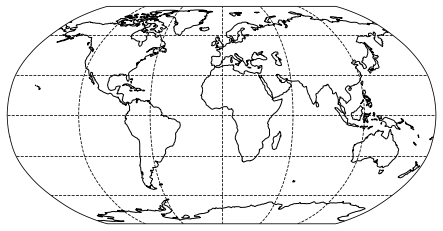

In [15]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection = ccrs.Robinson())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')
clevs = np.arange(0,19,1)
plt.contourf(lon, lat, total_ws, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Daily Average 2-meter Wind Speed, 1 June 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

In [41]:
ws_direction = np.arctan2(v10m_cc_loc,u10m_cc_loc)

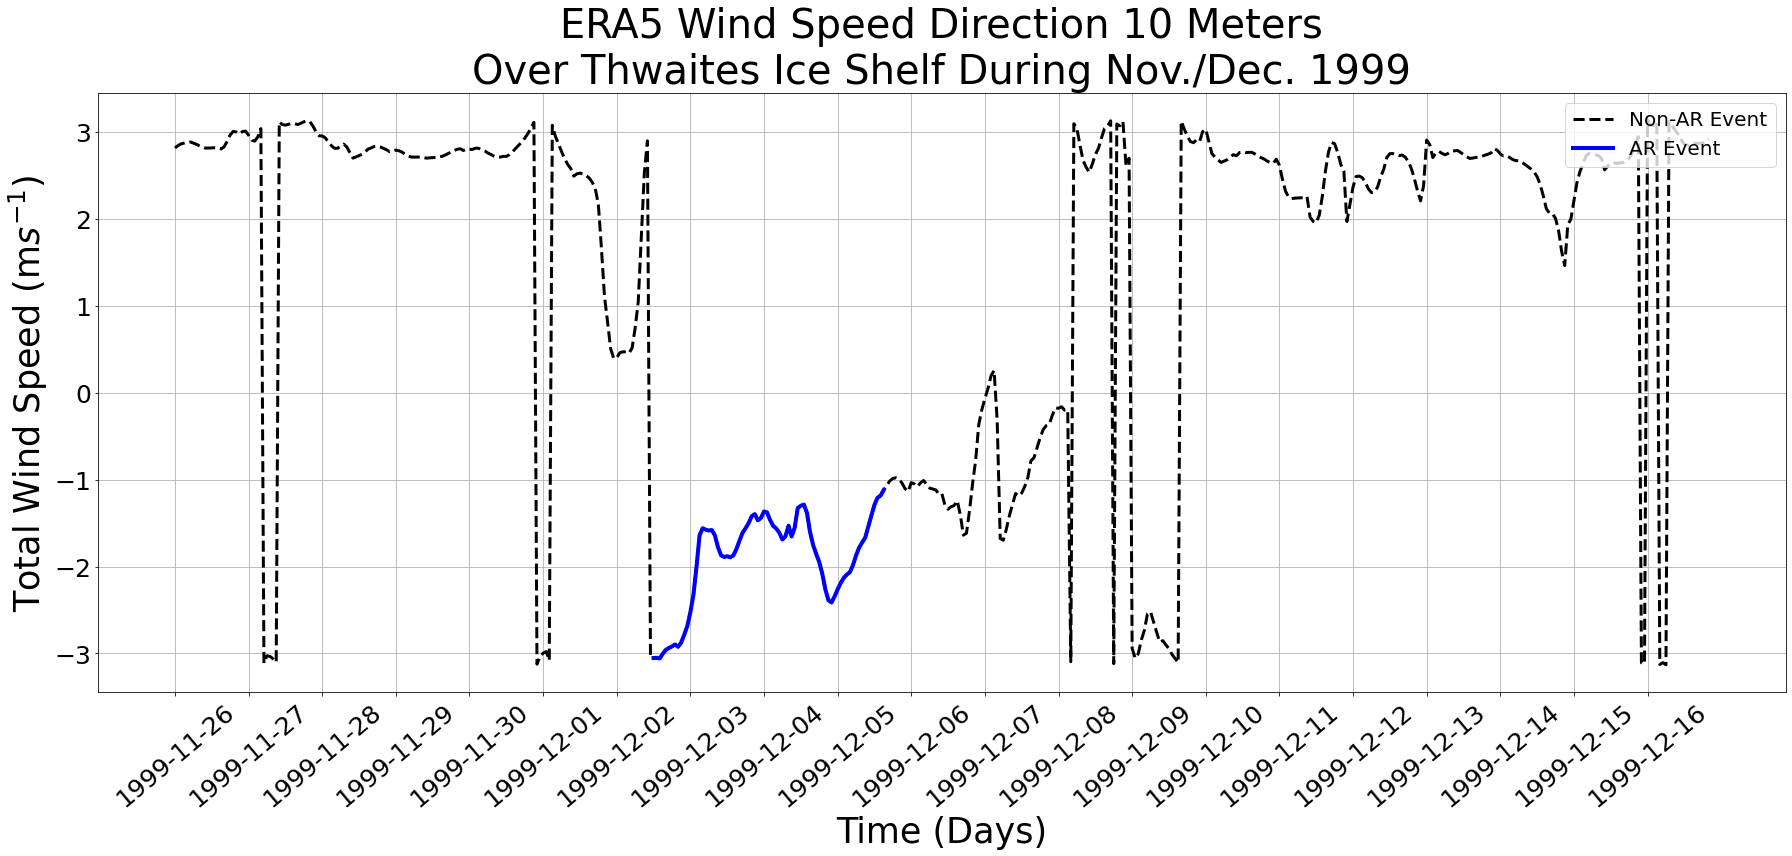

In [49]:
plt.figure(figsize=(25,12))
xaxis = np.linspace(0, len(time) - 1, len(time))
plt.plot(xaxis[600:1101], ws_direction[600:1101], '--', linewidth = 3, color = 'black', label = 'Non-AR Event')
plt.plot(xaxis[756:832], ws_direction[756:832], linewidth = 4, color = 'blue', label = 'AR Event')
plt.xticks(xaxis[600:1101][::24], time_dates[600:1101][::24], rotation = 40, fontsize = 25)
plt.yticks(fontsize = 25)
plt.title('ERA5 Wind Speed Direction 10 Meters\nOver Thwaites Ice Shelf During Nov./Dec. 1999', fontsize = 40)
plt.xlabel('Time (Days)', fontsize = 35)
plt.ylabel(r'Total Wind Speed (m$s^{-1}$)', fontsize = 35)
plt.legend(loc = 'upper right', prop = {'size': 20})
plt.tight_layout()
plt.grid()
plt.show()